Join the data from Part 1 with the data from Part 2 to create a new dataframe.

### CityBikes API

In [1]:
import requests
import pandas as pd

# Step 1: Get the list of networks (cities)
networks_url = "https://api.citybik.es/v2/networks"
response = requests.get(networks_url)
networks_data = response.json()

# Step 2: Convert the 'networks' part of the JSON data to a DataFrame
networks_df = pd.DataFrame(networks_data['networks'])

# Step 3: Display the column names
print(networks_df.columns)

Index(['company', 'href', 'id', 'location', 'name', 'source', 'gbfs_href',
       'ebikes', 'license'],
      dtype='object')


### Yelp API

In [2]:
import requests
import pandas as pd

# Step 1: Get the list of networks (cities)
networks_url = "https://api.citybik.es/v2/networks"
response = requests.get(networks_url)
networks_data = response.json()

# Convert the 'networks' part of the data to a DataFrame
networks_df = pd.DataFrame(networks_data['networks'])

# Display all column names
print("Columns in the DataFrame:")
print(networks_df.columns)

# Display the first 5 rows of the DataFrame
print("\nFirst 50 rows of the DataFrame:")
print(networks_df.head())

Columns in the DataFrame:
Index(['company', 'href', 'id', 'location', 'name', 'source', 'gbfs_href',
       'ebikes', 'license'],
      dtype='object')

First 50 rows of the DataFrame:
                company                                               href  \
0      [ЗАО «СитиБайк»]                       /v2/networks/velobike-moscow   
1   [Comunicare S.r.l.]                      /v2/networks/bicincitta-siena   
2  [Cyclopolis Systems]                   /v2/networks/cyclopolis-maroussi   
3  [Cyclopolis Systems]                    /v2/networks/cyclopolis-nafplio   
4   [Comunicare S.r.l.]  /v2/networks/bicincitta-parco-dei-colli-di-ber...   

                                      id  \
0                        velobike-moscow   
1                       bicincitta-siena   
2                    cyclopolis-maroussi   
3                     cyclopolis-nafplio   
4  bicincitta-parco-dei-colli-di-bergamo   

                                            location        name  \
0  {'city': '

## Join CityBikes API with Yelp API

In [3]:
import requests
import pandas as pd

# Step 1: Get the list of networks (cities)
networks_url = "https://api.citybik.es/v2/networks"
response = requests.get(networks_url)
networks_data = response.json()

# Convert the 'networks' part of the data to a DataFrame
networks_df = pd.DataFrame(networks_data['networks'])

# Display all column names
print("Columns in the DataFrame:")
print(networks_df.columns)

# Display the first 20 rows of the DataFrame
print("\nFirst 20 rows of the DataFrame:")
print(networks_df.head(20))

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    city = location['city']
    country = location['country']
    latitude = location['latitude']
    longitude = location['longitude']

    print(f"Location of {network_id}: City: {city}, Country: {country}, Latitude: {latitude}, Longitude: {longitude}")

    # Yelp API credentials
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"  # Replace with your actual API key
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }

    # Yelp API endpoint and parameters for searching businesses
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "restaurants",  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50  # number of results to return
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # Convert the 'businesses' part of the data to a DataFrame
    businesses_df = pd.DataFrame(data['businesses'])

    # Display all column names
    print("Columns in the DataFrame:")
    print(businesses_df.columns)

    # Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(businesses_df.head())

    # Add network_id to the businesses DataFrame for merging
    businesses_df['network_id'] = network_id

    # Merge the two DataFrames
    merged_df = pd.merge(toronto_network, businesses_df, left_on='id', right_on='network_id')

    # Display the merged DataFrame
    print("\nMerged DataFrame:")
    print(merged_df.head())

else:
    print(f"No network found with id {network_id}")

Columns in the DataFrame:
Index(['company', 'href', 'id', 'location', 'name', 'source', 'gbfs_href',
       'ebikes', 'license'],
      dtype='object')

First 20 rows of the DataFrame:
                 company                                               href  \
0       [ЗАО «СитиБайк»]                       /v2/networks/velobike-moscow   
1    [Comunicare S.r.l.]                      /v2/networks/bicincitta-siena   
2   [Cyclopolis Systems]                   /v2/networks/cyclopolis-maroussi   
3   [Cyclopolis Systems]                    /v2/networks/cyclopolis-nafplio   
4    [Comunicare S.r.l.]  /v2/networks/bicincitta-parco-dei-colli-di-ber...   
5   [Cyclopolis Systems]                  /v2/networks/cyclopolis-aigialeia   
6   [Cyclopolis Systems]                   /v2/networks/cyclopolis-marathon   
7    [Comunicare S.r.l.]                    /v2/networks/bicincitta-mantova   
8   [Cyclopolis Systems]                  /v2/networks/cyclopolis-neasmyrni   
9   [Cyclopolis Systems] 

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Ubication relate to "bixi-toronto"

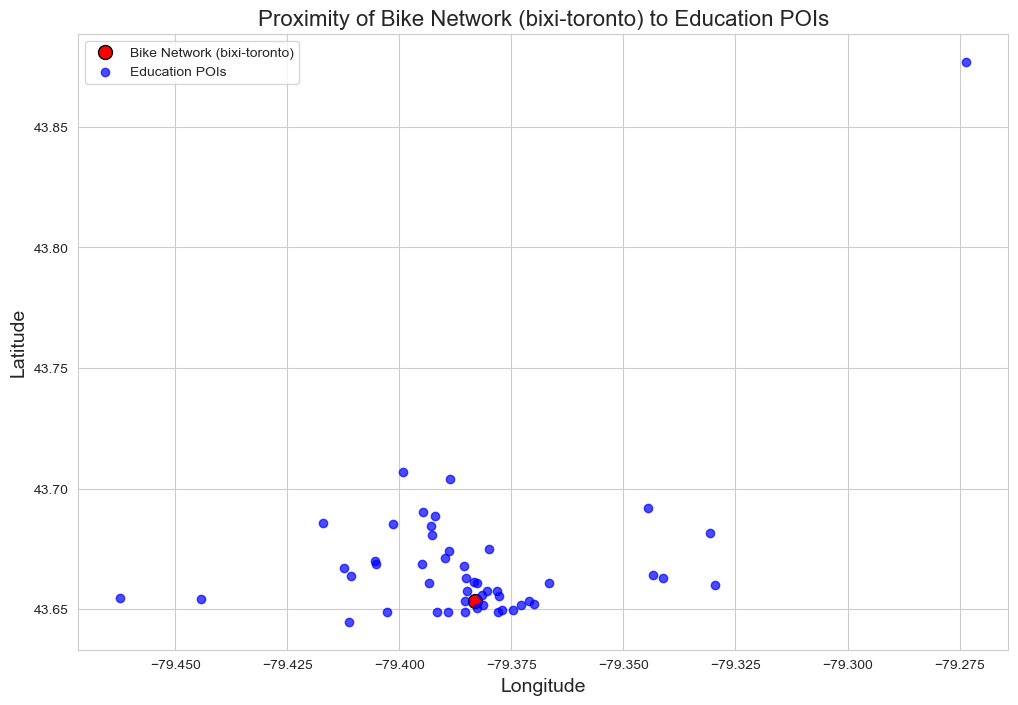

In [6]:
### Education place 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch education POIs from Yelp
def fetch_education_pois(yelp_api_key, latitude, longitude):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "education",  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    education_pois_df = fetch_education_pois(yelp_api_key, latitude, longitude)

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot education POIs
    plt.scatter(education_pois_df['coordinates'].apply(lambda x: x['longitude']), 
                education_pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Education POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Education POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

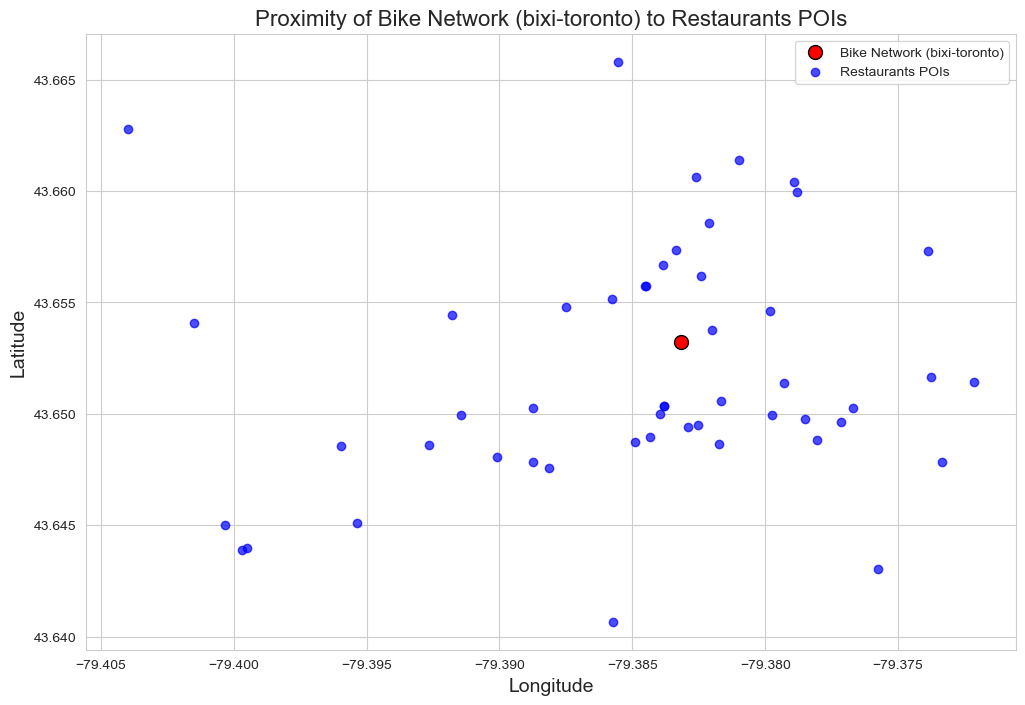

In [7]:
### Restaurants places

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch restaurants POIs from Yelp
def fetch_restaurants_pois(yelp_api_key, latitude, longitude):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "restaurants",  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    education_pois_df = fetch_restaurants_pois(yelp_api_key, latitude, longitude)

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot restaurant POIs
    plt.scatter(education_pois_df['coordinates'].apply(lambda x: x['longitude']), 
                education_pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Restaurants POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Restaurants POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

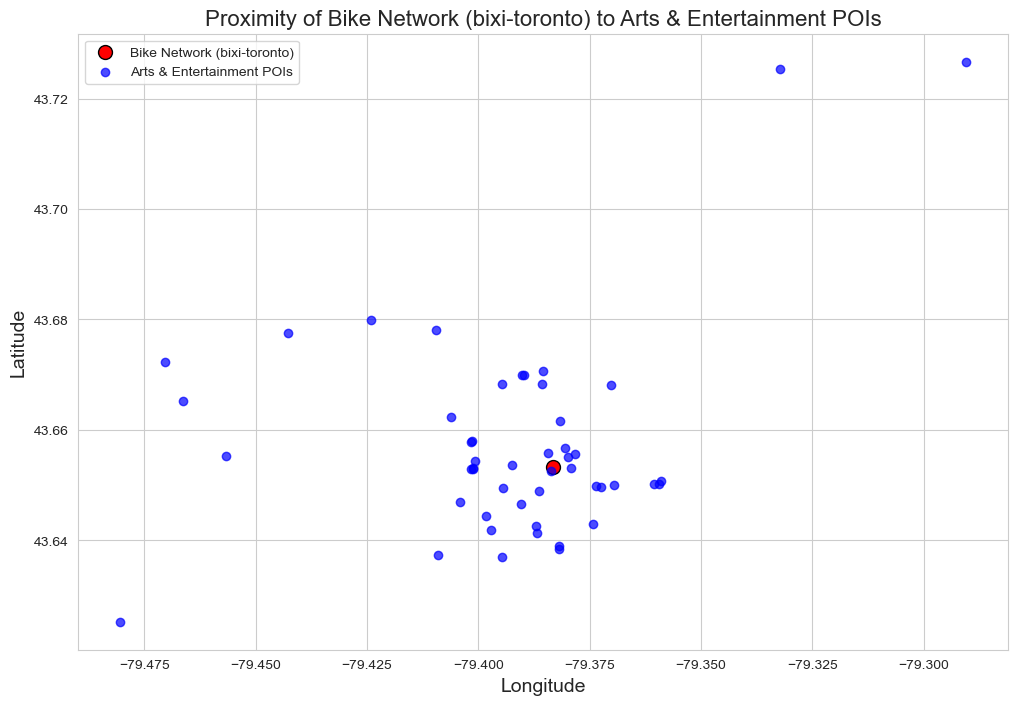

In [8]:
### Arts & Entertainment

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch POIs from Yelp
def fetch_pois(yelp_api_key, latitude, longitude, term="Arts & Entertainment"):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": term,  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    pois_df = fetch_pois(yelp_api_key, latitude, longitude, term="Arts & Entertainment")

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot Arts & Entertainment POIs
    plt.scatter(pois_df['coordinates'].apply(lambda x: x['longitude']), 
                pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Arts & Entertainment POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Arts & Entertainment POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

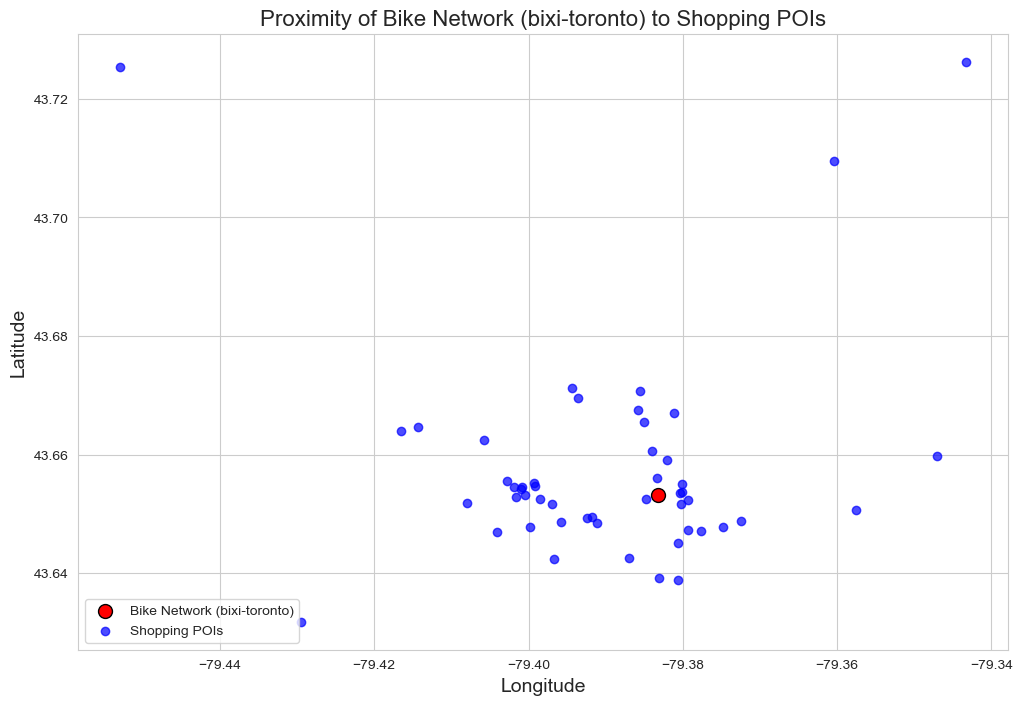

In [10]:
### Shopping places

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch shopping POIs from Yelp
def fetch_shopping_pois(yelp_api_key, latitude, longitude):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "shopping",  # search term changed to shopping
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    shopping_pois_df = fetch_shopping_pois(yelp_api_key, latitude, longitude)

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot shopping POIs
    plt.scatter(shopping_pois_df['coordinates'].apply(lambda x: x['longitude']), 
                shopping_pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Shopping POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Shopping POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

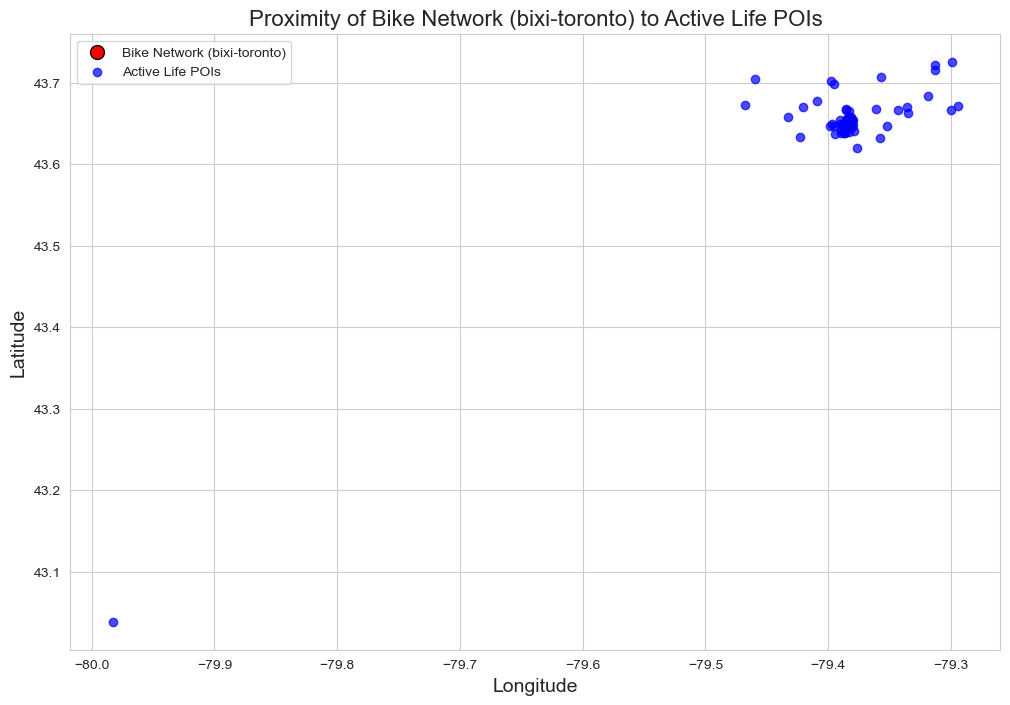

In [11]:
###Active Life places


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch Active Life POIs from Yelp
def fetch_active_life_pois(yelp_api_key, latitude, longitude):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "Active Life",  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    active_life_pois_df = fetch_active_life_pois(yelp_api_key, latitude, longitude)

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot Active Life POIs
    plt.scatter(active_life_pois_df['coordinates'].apply(lambda x: x['longitude']), 
                active_life_pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Active Life POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Active Life POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

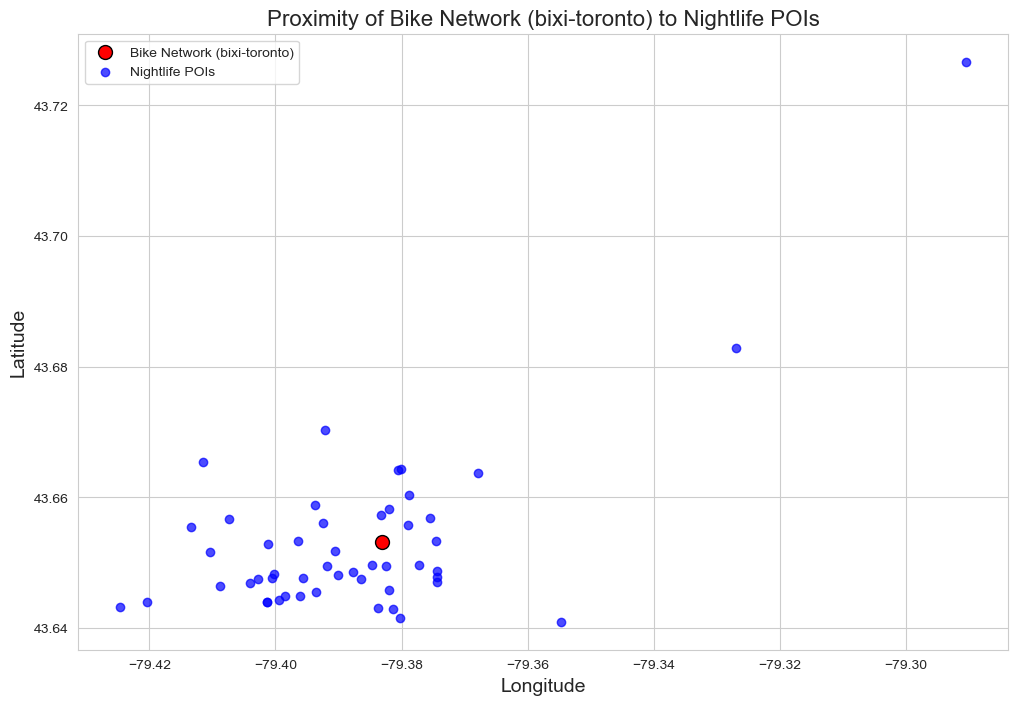

In [12]:
### Nightlife Places


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# Function to fetch bike network data
def fetch_bike_network_data():
    networks_url = "https://api.citybik.es/v2/networks"
    response = requests.get(networks_url)
    networks_data = response.json()
    return pd.DataFrame(networks_data['networks'])

# Function to fetch nightlife POIs from Yelp
def fetch_nightlife_pois(yelp_api_key, latitude, longitude):
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "nightlife",  # search term changed to nightlife
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return pd.DataFrame(data['businesses'])

# Fetch data
networks_df = fetch_bike_network_data()

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    latitude = location['latitude']
    longitude = location['longitude']

    # Yelp API key
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"
    nightlife_pois_df = fetch_nightlife_pois(yelp_api_key, latitude, longitude)

    # Prepare the data for visualization
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot bike network location
    plt.scatter(longitude, latitude, color='red', label='Bike Network (bixi-toronto)', s=100, edgecolor='k')

    # Plot nightlife POIs
    plt.scatter(nightlife_pois_df['coordinates'].apply(lambda x: x['longitude']), 
                nightlife_pois_df['coordinates'].apply(lambda x: x['latitude']),
                color='blue', label='Nightlife POIs', alpha=0.7)

    # Add titles and labels
    plt.title('Proximity of Bike Network (bixi-toronto) to Nightlife POIs', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No network found with id {network_id}")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [4]:
import sqlite3
import pandas as pd
import requests

# Step 1: Get the list of networks (cities)
networks_url = "https://api.citybik.es/v2/networks"
response = requests.get(networks_url)
networks_data = response.json()

# Convert the 'networks' part of the data to a DataFrame
networks_df = pd.DataFrame(networks_data['networks'])

# Filter the Citybikes data to get the location of 'bixi-toronto'
network_id = "bixi-toronto"
toronto_network = networks_df[networks_df['id'] == network_id]

if not toronto_network.empty:
    location = toronto_network.iloc[0]['location']
    city = location['city']
    country = location['country']
    latitude = location['latitude']
    longitude = location['longitude']

    print(f"Location of {network_id}: City: {city}, Country: {country}, Latitude: {latitude}, Longitude: {longitude}")

    # Yelp API credentials
    yelp_api_key = "MhqSMn4dc_4WPApc66ujglh2uPky9bJ32hNM-x6PLMiLH_CPGjbbpo2wipAE5z6TAVb9Y1VpuYNU0R891UjVVQTtTdau2_Rs3mhBBW2vGcCCycokGJ56zbh67a6mZnYx"  # Replace with your actual API key
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {yelp_api_key}"
    }

    # Yelp API endpoint and parameters for searching businesses
    url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "term": "restaurants",  # search term
        "latitude": latitude,
        "longitude": longitude,
        "limit": 50  # number of results to return
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # Convert the 'businesses' part of the data to a DataFrame
    businesses_df = pd.DataFrame(data['businesses'])

    # Add network_id to the businesses DataFrame for merging
    businesses_df['network_id'] = network_id

    # Merge the two DataFrames
    merged_df = pd.merge(toronto_network, businesses_df, left_on='id', right_on='network_id')

    # Step 1: Connect to SQLite and create database
    conn = sqlite3.connect('bike_networks_and_pois.db')
    cursor = conn.cursor()

    # Step 2: Create tables
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS bike_networks (
        id TEXT PRIMARY KEY,
        name TEXT,
        city TEXT,
        country TEXT,
        latitude REAL,
        longitude REAL
    )
    ''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS yelp_businesses (
        id TEXT PRIMARY KEY,
        name TEXT,
        review_count INTEGER,
        rating REAL,
        latitude REAL,
        longitude REAL,
        network_id TEXT,
        FOREIGN KEY (network_id) REFERENCES bike_networks(id)
    )
    ''')

    # Step 3: Insert data into tables
    # Insert bike networks data
    for index, row in toronto_network.iterrows():
        cursor.execute('''
        INSERT OR REPLACE INTO bike_networks (id, name, city, country, latitude, longitude)
        VALUES (?, ?, ?, ?, ?, ?)
        ''', (row['id'], row['name'], row['location']['city'], row['location']['country'], row['location']['latitude'], row['location']['longitude']))

    # Insert Yelp businesses data
    for index, row in businesses_df.iterrows():
        cursor.execute('''
        INSERT OR REPLACE INTO yelp_businesses (id, name, review_count, rating, latitude, longitude, network_id)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        ''', (row['id'], row['name'], row['review_count'], row['rating'], row['coordinates']['latitude'], row['coordinates']['longitude'], row['network_id']))

    # Commit the transaction
    conn.commit()

    # Step 4: Verify data insertion
    print("\nBike Networks:")
    for row in cursor.execute('SELECT * FROM bike_networks'):
        print(row)

    print("\nYelp Businesses:")
    for row in cursor.execute('SELECT * FROM yelp_businesses'):
        print(row)

    # Close the connection
    conn.close()

else:
    print(f"No network found with id {network_id}")

Location of bixi-toronto: City: Toronto, ON, Country: CA, Latitude: 43.653226, Longitude: -79.3831843

Bike Networks:
('bixi-toronto', 'Bike Share Toronto', 'Toronto, ON', 'CA', 43.653226, -79.3831843)

Yelp Businesses:
('r_BrIgzYcwo1NAuG9dLbpg', 'Pai Northern Thai Kitchen', 3669, 4.4, 43.64784, -79.38872, 'bixi-toronto')
('cbAVxQjvujfZU0RvqAmtzg', 'Mogouyan Hand-Pulled Noodles', 101, 4.5, 43.65573, -79.38449, 'bixi-toronto')
('qekAZVcOoJjMBnN5rJ_4fQ', 'The Rabbit Hole', 46, 4.2, 43.64995, -79.37976, 'bixi-toronto')
('mZRKH9ngRY92bI_irrHq6w', 'Richmond Station', 936, 4.4, 43.6513729, -79.379285, 'bixi-toronto')
('G23jEVyQEGhnxAvsgaOvDA', 'Iwami', 19, 4.8, 43.650341, -79.383827, 'bixi-toronto')
('Yl2TN9c23ZGLUBSD9ks5Uw', 'Byblos', 948, 4.4, 43.647546, -79.388123, 'bixi-toronto')
('ArBfjF0C62mHhNCyBozFQQ', 'LOCAL Public Eatery Adelaide', 12, 4.2, 43.648968713601, -79.384350052184, 'bixi-toronto')
('0tA-dLoTEJRMi1Sv9RtBVA', 'Paradise Grotto', 8, 4.6, 43.648053177358186, -79.39008610206244

Look at the data before and after the join to validate your data.

In [5]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('bike_networks_and_pois.db')

# Query to get table schema
columns_query = "PRAGMA table_info(yelp_businesses);"
columns_df = pd.read_sql_query(columns_query, conn)

# Display column information
print("Columns in 'yelp_businesses' table:")
print(columns_df)

# Close the connection
conn.close()

Columns in 'yelp_businesses' table:
   cid          name     type  notnull dflt_value  pk
0    0            id     TEXT        0       None   1
1    1          name     TEXT        0       None   0
2    2  review_count  INTEGER        0       None   0
3    3        rating     REAL        0       None   0
4    4      latitude     REAL        0       None   0
5    5     longitude     REAL        0       None   0
6    6    network_id     TEXT        0       None   0
